# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

## Using Gaussian prior for `k1`

100%|██████████| 3000/3000 [00:04<00:00, 743.46it/s]
Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file. Check the MCMC diagnostics to evaluate convergence.
{'Autocorrelation time for each parameter': array([53.7319391]), 'Acceptance fraction (fraction of steps that were accepted)': array([0.80866667, 0.81333333, 0.808     , 0.80066667, 0.798     ])}
Parameter posterior distribution convergence plots:


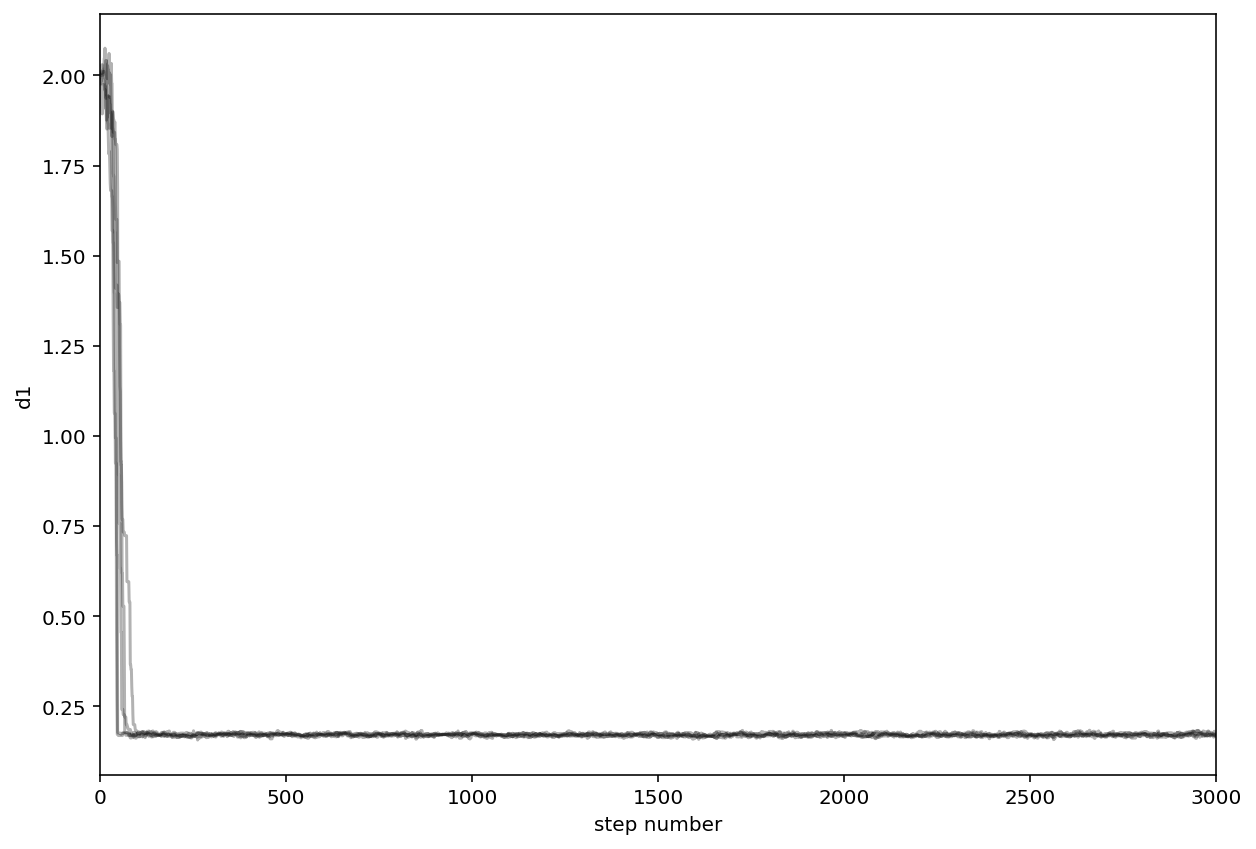

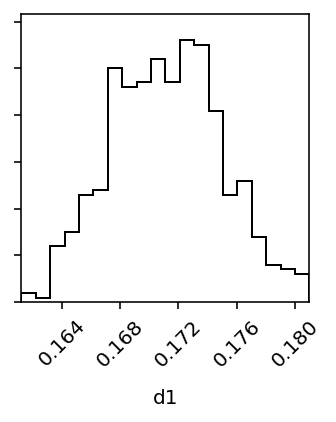

In [4]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.inference import py_inference
import numpy as np
import pylab as plt
import pandas as pd
# Import a bioscrape/SBML model
M = Model(sbml_filename = 'toy_sbml_model.xml')
# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
M.set_species({'X':df['X'][0]})

# Create prior for parameters
prior = {'d1' : ['gaussian', 0.2, 200]}
sampler, pid = py_inference(Model = M, exp_data = df, measurements = ['X'], time_column = ['time'],
            nwalkers = 5, init_seed = np.array([2]), nsteps = 3000, sim_type = 'deterministic',
            params_to_estimate = ['d1'], prior = prior)


# Using mixed priors and estimate both `k1` and `d1`

100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:26<00:00, 210.65it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file
Parameter posterior distribution convergence plots:


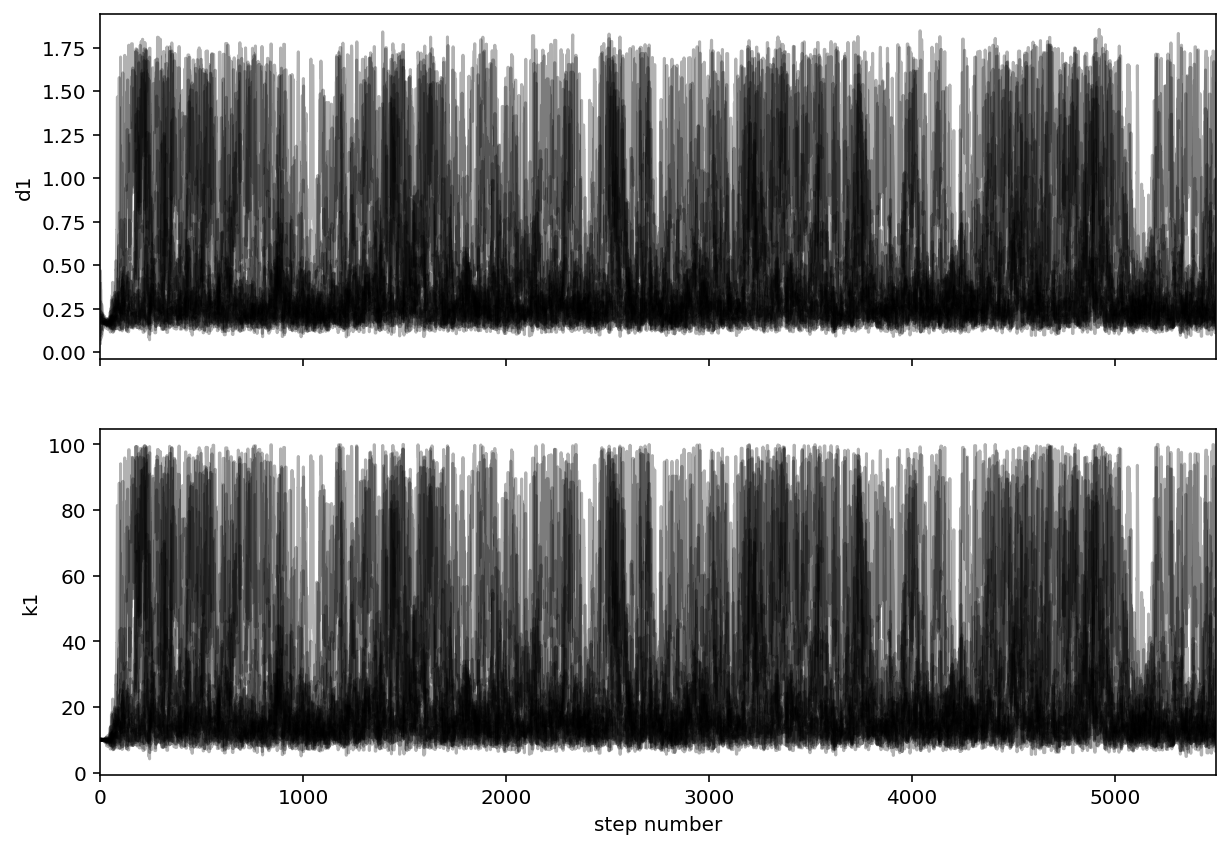

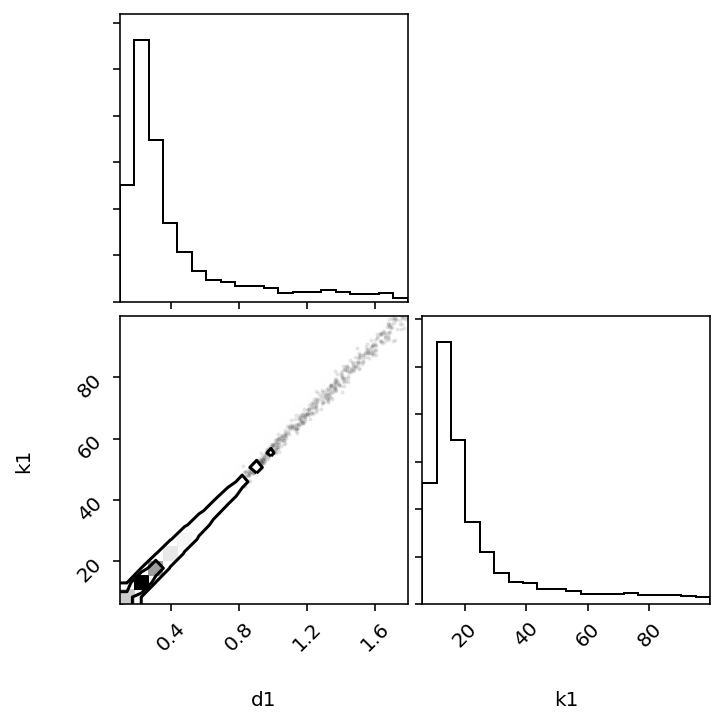

In [3]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.inference import py_inference

import numpy as np
import pylab as plt
import pandas as pd
# Import a bioscrape/SBML model
M = Model(sbml_filename = 'toy_sbml_model.xml')
# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
M.set_species({'X':df['X'][0]})

prior = {'d1' : ['gaussian', 0.2, 20], 'k1' : ['uniform', 0, 100]}

sampler, pid = py_inference(Model = M, exp_data = df, measurements = ['X'], time_column = ['time'],
            nwalkers = 20, init_seed = 0.15, nsteps = 5500, sim_type = 'deterministic',
            params_to_estimate = ['d1', 'k1'], prior = prior)


### Check mcmc_results.csv for the results of the MCMC procedure and perform your own analysis.

### You can also plot the results as follows

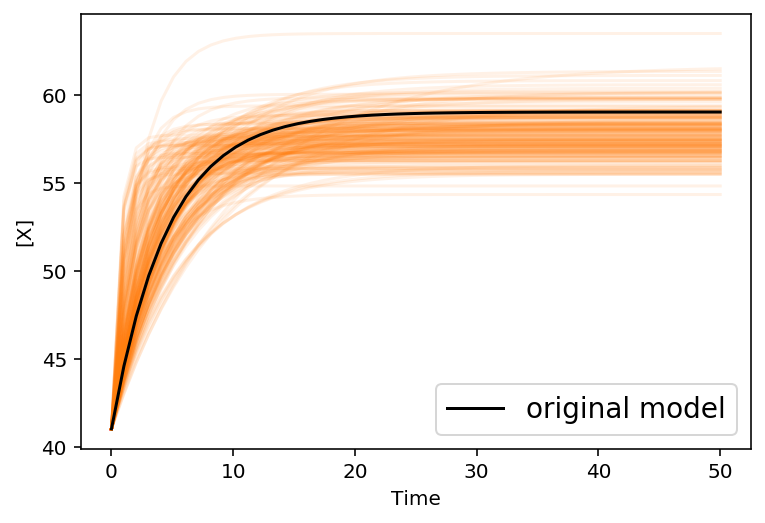

In [4]:
from bioscrape.simulator import py_simulate_model

M_fit = Model(sbml_filename = 'toy_sbml_model.xml')
M_fit.set_species({'X':df['X'][0]})
timepoints = pid.timepoints
flat_samples = sampler.get_chain(discard=200, thin=15, flat=True)
inds = np.random.randint(len(flat_samples), size=200)
for ind in inds:
    sample = flat_samples[ind]
    for pi, pi_val in zip(pid.params_to_estimate, sample):
        M_fit.set_parameter(pi, pi_val)
    plt.plot(timepoints, py_simulate_model(timepoints, Model= M_fit)['X'], "C1", alpha=0.1)
# plt.errorbar(, y, yerr=yerr, fmt=".k", capsize=0)
# plt.plot(timepoints, list(pid.exp_data['X']), label = 'data')
plt.plot(timepoints, py_simulate_model(timepoints, Model = M)['X'], "k", label="original model")
plt.legend(fontsize=14)
plt.xlabel("Time")
plt.ylabel("[X]");

In [5]:
flat_samples = sampler.get_chain(discard = 200, thin = 15,flat = True)
flat_samples

array([[ 0.4784419 , 27.79872457],
       [ 0.34054321, 20.0828659 ],
       [ 1.32311468, 75.59997431],
       ...,
       [ 0.98966837, 56.11233346],
       [ 0.17937509, 10.27539046],
       [ 0.3539683 , 21.11574101]])

## Alll methods above have other advanced options that you can use. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.